# Objetivos

Tras haber probado distintos modelos obteniendo un R2 más bajo de lo deseado en el data_cleaner, con este ipynb se desea obtener un R2 más próximo a 1 mediante la introducción de nuevas columnas que pueden actuar de forma determinante en los modelos.

# Importación de librerías

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

# Importación de datos

In [2]:
train = pd.read_csv('../data/train.csv')
train.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands","Living in the countryside, just near Amsterdam...",within a few hours,100%,75%,f,https://a0.muscache.com/im/users/3040748/profi...,https://a0.muscache.com/im/users/3040748/profi...,NaN,13,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,NaN,52.39508,4.99186,Private room in farm stay,Private room,3,NaN,1.5 shared baths,1.0,NaN,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a5da3...,https://a0.muscache.com/im/pictures/user/a5da3...,Weesperbuurt en Plantage,0,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,52.36371,4.90745,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,3,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


In [3]:
# Vamos a ver cuáles son las columnas con valores nulos

nulls = list(train.columns[train.isnull().any()])

In [4]:
# Vamos a eliminar las columnas que tienen más del 50% de valores nulos
elim=[]

for i in range(len(nulls)):
    if train.shape[0]*0.5 < sum(train[nulls[i]].isnull()):
        print(nulls[i]) # para saber qué columnas son eliminadas
        train.drop(nulls[i], axis=1, inplace=True)
        elim.append(nulls[i])

neighbourhood_group_cleansed
bathrooms
calendar_updated


In [5]:
for i in elim:
    nulls.remove(i)
    
nulls[:2]

['description', 'neighborhood_overview']

## Elección de las columnas para el modelo

Vamos a elegir las columnas que esten menos correlacionadas, para ello, veamos cómo el heatmap.

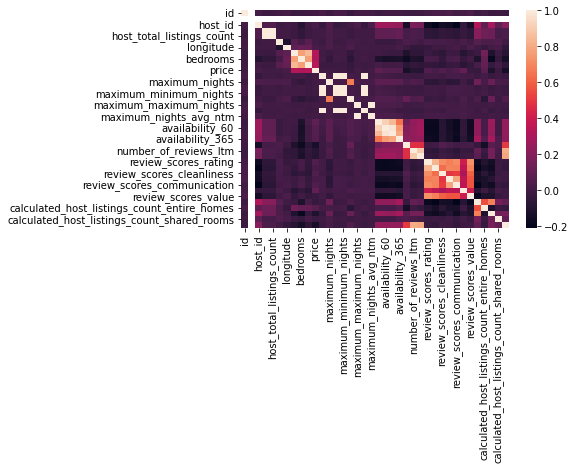

In [6]:
sns.heatmap(train.corr(), fmt=".2f");

Como con esto no se clarifica absolutamente nada (porque tenemos tres millones de columnas), nos hacemos un bucle asqueroso y vamos tirando columnas que tengan una correlación superior 0.8

In [7]:
# matriz con las correlaciones que guardan las columnas

upper = train.corr().abs().where(np.triu(np.ones(train.corr().abs().shape), k=1).astype(np.bool))

#lista de columnas que guardan correlacion elevada
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['host_total_listings_count',
 'beds',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_60',
 'availability_90',
 'number_of_reviews_l30d',
 'review_scores_accuracy',
 'reviews_per_month']

In [8]:
# las eliminamos del dataframe original
train.drop(to_drop, axis=1, inplace =True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   listing_url                                   4167 non-null   object 
 2   scrape_id                                     4167 non-null   int64  
 3   last_scraped                                  4167 non-null   object 
 4   name                                          4167 non-null   object 
 5   description                                   4159 non-null   object 
 6   neighborhood_overview                         3004 non-null   object 
 7   picture_url                                   4167 non-null   object 
 8   host_id                                       4167 non-null   int64  
 9   host_url                                      4167 non-null   o

In [9]:
# Vamos a eliminar las columnas que tienen más del 40% de datos nulos
to_drop2 = []
cols = list(train.columns)

for i in range(len(cols)):
    if sum(train[cols[i]].isnull()) > train.shape[0]*0.4:
        to_drop2.append(cols[i])
        train.drop(cols[i], axis=1, inplace=True)

train.shape

(4167, 59)

In [10]:
cols[:3]

['id', 'listing_url', 'scrape_id']

## Elección de la columnas determinantes

In [11]:
cols_guays = ['id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
             'bathrooms_text', 'bedrooms', 'price', 'minimum_nights', 'has_availability', 'availability_30',
             'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_location', 
             'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

In [12]:
df = train[cols_guays]
df.head()
df.shape

(4167, 18)

En primer lugar, observamos que hay columnas que se refieren a booleanos representadas por 't' y 'f', pues vamos a reemplazarlos por 0's y 1's

In [13]:
df.host_is_superhost.replace('t', 1, inplace=True)
df.host_is_superhost.replace('f', 0, inplace=True)
df.has_availability.replace('t', 1, inplace=True)
df.has_availability.replace('f', 0, inplace=True)

Veamos como se distribuye el alquiler de airbnb en fnción de los barrios del piso/casa

In [14]:
len(df.neighbourhood_cleansed.unique())

22

In [15]:
dic = dict(df.neighbourhood_cleansed.value_counts())
dic

{'Centrum-West': 639,
 'De Baarsjes - Oud-West': 611,
 'Centrum-Oost': 470,
 'De Pijp - Rivierenbuurt': 423,
 'Zuid': 275,
 'Westerpark': 266,
 'Oud-Oost': 241,
 'Bos en Lommer': 193,
 'Oud-Noord': 188,
 'Oostelijk Havengebied - Indische Buurt': 166,
 'IJburg - Zeeburgereiland': 111,
 'Watergraafsmeer': 108,
 'Noord-West': 88,
 'Noord-Oost': 76,
 'Slotervaart': 68,
 'Geuzenveld - Slotermeer': 58,
 'Buitenveldert - Zuidas': 44,
 'De Aker - Nieuw Sloten': 38,
 'Gaasperdam - Driemond': 32,
 'Osdorp': 29,
 'Bijlmer-Centrum': 28,
 'Bijlmer-Oost': 15}

In [16]:
count = 1
for i in list(dic.keys())[::-1]:
    dic[i] = count
    count += 1
dic

{'Centrum-West': 22,
 'De Baarsjes - Oud-West': 21,
 'Centrum-Oost': 20,
 'De Pijp - Rivierenbuurt': 19,
 'Zuid': 18,
 'Westerpark': 17,
 'Oud-Oost': 16,
 'Bos en Lommer': 15,
 'Oud-Noord': 14,
 'Oostelijk Havengebied - Indische Buurt': 13,
 'IJburg - Zeeburgereiland': 12,
 'Watergraafsmeer': 11,
 'Noord-West': 10,
 'Noord-Oost': 9,
 'Slotervaart': 8,
 'Geuzenveld - Slotermeer': 7,
 'Buitenveldert - Zuidas': 6,
 'De Aker - Nieuw Sloten': 5,
 'Gaasperdam - Driemond': 4,
 'Osdorp': 3,
 'Bijlmer-Centrum': 2,
 'Bijlmer-Oost': 1}

In [17]:
# reemplazamos el nombre del barrio por la asignación de calidad que le hemos dado en el diccionario


for key in list(dic.keys()):
    df.neighbourhood_cleansed.replace(key, dic[key], inplace=True)
    
df.head()

,id,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,price,minimum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_location,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,0,9,Private room in farm stay,Private room,3,1.5 shared baths,1.0,87.0,2,1,0,81,0,4.62,4.69,10,0
1,1,0,20,Entire rental unit,Entire home/apt,4,1 bath,2.0,250.0,2,1,3,9,4,5.00,5.00,0,0
2,2,1,18,Room in serviced apartment,Hotel room,2,1 private bath,1.0,151.0,1,1,25,47,3,4.79,4.87,0,0
3,3,0,21,Entire rental unit,Entire home/apt,2,1.5 baths,1.0,139.0,2,1,0,10,3,5.00,4.90,0,0
4,4,1,18,Private room in rental unit,Private room,2,1.5 baths,1.0,95.0,2,1,18,166,1,4.67,4.49,1,0


Vamos a arreglar las columnas categóricas, viendo primero los valores unicos que tienen cada una de estas columnas

In [18]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [19]:
len(df.property_type.unique())

53

In [20]:
property_dummies = pd.get_dummies(df['property_type'])
room_dummies = pd.get_dummies(df['room_type'])

# metemos los dummies
df_def = pd.concat((df.drop(['property_type', 'room_type'], axis=1), \
    property_dummies.astype(int), \
    room_dummies.astype(int)), \
    axis=1)

df_def.head()                   

,id,host_is_superhost,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,price,minimum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_location,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Barn,Boat,Camper/RV,Casa particular,Cave,Entire cabin,Entire chalet,Entire condominium (condo),Entire cottage,Entire guest suite,Entire guesthouse,Entire home/apt,Entire loft,Entire place,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Entire vacation home,Entire villa,Houseboat,Private room,Private room in bed and breakfast,Private room in boat,Private room in cabin,Private room in casa particular,Private room in condominium (condo),Private room in farm stay,Private room in guest suite,Private room in guesthouse,Private room in hostel,Private room in houseboat,Private room in loft,Private room in rental unit,Private room in residential home,Private room in serviced apartment,Private room in tiny house,Private room in townhouse,Private room in villa,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in serviced apartment,Shared room in bed and breakfast,Shared room in boat,Shared room in hostel,Shared room in houseboat,Shared room in rental unit,Shared room in residential home,Tiny house,Tower,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,9,3,1.5 shared baths,1.0,87.0,2,1,0,81,0,4.62,4.69,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,20,4,1 bath,2.0,250.0,2,1,3,9,4,5.00,5.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,1,18,2,1 private bath,1.0,151.0,1,1,25,47,3,4.79,4.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0,21,2,1.5 baths,1.0,139.0,2,1,0,10,3,5.00,4.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,1,18,2,1.5 baths,1.0,95.0,2,1,18,166,1,4.67,4.49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Ahora voy a modificar el bathroom_text, cambiando el texto por el valor del primer numero que aparezca

In [21]:
import re

def numero(string):
    try:
        return float(re.findall(r'[-+]?\d*\.\d+|\d+', string)[0])
    except:
        return 0

df_def['bathrooms_text'] = df_def['bathrooms_text'].apply(numero)
mean = df_def['bathrooms_text'].mean()
df_def['bathrooms_text'] = df_def['bathrooms_text'].fillna(mean)

In [22]:
df_def.head()

,id,host_is_superhost,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,price,minimum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_location,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Barn,Boat,Camper/RV,Casa particular,Cave,Entire cabin,Entire chalet,Entire condominium (condo),Entire cottage,Entire guest suite,Entire guesthouse,Entire home/apt,Entire loft,Entire place,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Entire vacation home,Entire villa,Houseboat,Private room,Private room in bed and breakfast,Private room in boat,Private room in cabin,Private room in casa particular,Private room in condominium (condo),Private room in farm stay,Private room in guest suite,Private room in guesthouse,Private room in hostel,Private room in houseboat,Private room in loft,Private room in rental unit,Private room in residential home,Private room in serviced apartment,Private room in tiny house,Private room in townhouse,Private room in villa,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in serviced apartment,Shared room in bed and breakfast,Shared room in boat,Shared room in hostel,Shared room in houseboat,Shared room in rental unit,Shared room in residential home,Tiny house,Tower,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,9,3,1.5,1.0,87.0,2,1,0,81,0,4.62,4.69,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,20,4,1.0,2.0,250.0,2,1,3,9,4,5.00,5.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,1,18,2,1.0,1.0,151.0,1,1,25,47,3,4.79,4.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0,21,2,1.5,1.0,139.0,2,1,0,10,3,5.00,4.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,1,18,2,1.5,1.0,95.0,2,1,18,166,1,4.67,4.49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Reemplazamiento de nulos en el df_def

In [23]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   host_is_superhost                             4167 non-null   int64  
 2   neighbourhood_cleansed                        4167 non-null   int64  
 3   accommodates                                  4167 non-null   int64  
 4   bathrooms_text                                4167 non-null   float64
 5   bedrooms                                      3914 non-null   float64
 6   price                                         4167 non-null   float64
 7   minimum_nights                                4167 non-null   int64  
 8   has_availability                              4167 non-null   int64  
 9   availability_30                               4167 non-null   i

Observamos que las columnas que poseen elementos nulos son: 'bedrooms', 'review_scores_rating', 'review_scores_location'.

In [24]:
df_def['bedrooms'].fillna(df_def['bedrooms'].mode(), inplace=True)

In [25]:
df_def['review_scores_location'].fillna(df_def['review_scores_location'].mean(), inplace = True)

In [26]:
df_def['review_scores_rating'].fillna(df_def['review_scores_rating'].mean(), inplace = True)

In [27]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   host_is_superhost                             4167 non-null   int64  
 2   neighbourhood_cleansed                        4167 non-null   int64  
 3   accommodates                                  4167 non-null   int64  
 4   bathrooms_text                                4167 non-null   float64
 5   bedrooms                                      3914 non-null   float64
 6   price                                         4167 non-null   float64
 7   minimum_nights                                4167 non-null   int64  
 8   has_availability                              4167 non-null   int64  
 9   availability_30                               4167 non-null   i

In [28]:
# QUeda solucionar tema nulos y mezclarlos con test